# Overskrift

<ul>
<li>Rense data
<li>Display data
<li>Kanskje finne noen pakker som støtter adx og de der?
<li>Sette indikatorverktøy i egne py filer


In [91]:
import warnings
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import matplotlib.pyplot as plt
import plotly.express as px
import stockstats
import sys
import os

from lib.rens import rens
from lib.god_runde import positiv_utvikling



In [100]:
def hent_indikatortall(data, gode):
    stock = stockstats.StockDataFrame.retype(data)
    stock['rsi_12']
    stock['trix']
    stock['adx']
    stock['kdjk']
    
    rsi = []
    trix = []
    adxr = []
    kdjk = []
    for ix, fin in gode.iterrows():
        oppgang = stock[int(fin.start):int(fin.endex)]
        rsi.append(oppgang.rsi_12.values)
        trix.append(oppgang.trix.values)
        adxr.append(oppgang.adxr.values)
        kdjk.append(oppgang.kdjk.values)
        
    
    return rsi, trix, adxr, kdjk      

def multi_analyse(filer):
    alle_gode = pd.DataFrame(columns=['navn'])

    for i, fil in enumerate(filer):
        print(f"{i+1} av {len(filer)} analysert" ,end='\r')
        data = cleanup.clean_data(pd.read_excel(fil))
        gode = pos_ut.calculate(data)
        rsi, trix, adxr, kdjk = hent_indikatortall(data, gode)
        gode['rsi'] = rsi
        gode['trix'] = trix
        gode['adxr'] = adxr
        gode['kdjk'] = kdjk
        gode['navn'] = fil.split('/')[1].split('.xl')[0]
        
        alle_gode = alle_gode.append(gode, ignore_index=True)
               
    return alle_gode


def add_data(word):
    ordet = 'data/' + word
    return ordet

In [35]:
cleanup = rens()
pos_ut = positiv_utvikling()

In [122]:
filer = list(map(add_data, os.listdir('data/')))
data = multi_analyse(filer)
data

,navn,start,endex,start_pris,slutt_pris,oppgang,score,rsi,trix,adxr,kdjk
0,Aker 02.04.2020,128.0,186.0,240.2,247.8,3.164030,50.703007,"[29.08667618110441, 29.086676181104394, 38.508...","[-0.04397465516493707, -0.045443866319610726, ...","[30.19964066608519, 33.407059607068106, 33.916...","[10.330356638278655, 6.886904425519103, 21.257..."
1,Aker 02.04.2020,229.0,267.0,245.8,249.6,1.545972,31.951273,"[53.226517486104214, 48.34750785504549, 48.347...","[-0.010354636272359287, -0.009138505674278392,...","[15.09565910714205, 13.631975273648532, 11.912...","[56.62048569675035, 57.74699046450004, 58.4979..."
2,Aker 30.04.2020,58.0,106.0,267.8,272.6,1.792382,36.304068,"[41.78270395470082, 40.892106268959026, 39.962...","[-0.10058224660774777, -0.0966240136151853, -0...","[30.14799872260209, 27.36654789275933, 24.8790...","[31.86117198134676, 40.28840036851708, 52.7848..."
3,Aker 30.04.2020,118.0,159.0,270.4,273.6,1.183432,30.083060,"[45.73450951161533, 48.60760072246316, 56.1974...","[-0.004073298420161102, -0.006143478019842823,...","[24.207935443619647, 21.939106323799766, 21.02...","[25.604326110013336, 50.40288407334222, 66.935..."
4,Aker 31.03.2020,41.0,70.0,227.8,235.0,3.160667,29.493962,"[46.31780108459648, 48.93053682593552, 46.4635...","[-0.04210342809995147, -0.04285742782661868, -...","[20.87775548017871, 19.120705227493804, 17.124...","[24.474026944328852, 39.39294103980881, 44.210..."
...,...,...,...,...,...,...,...,...,...,...,...
77,Yara International 29.04.2020,77.0,111.0,345.7,346.7,0.289268,21.578655,"[49.161054434926726, 49.161054434926726, 52.92...","[-0.003438019247969, -0.0031747305211763913, -...","[20.97064376245297, 17.924784854313817, 15.717...","[39.533950492531154, 38.855966995020324, 43.68..."
78,Yara International 29.04.2020,177.0,226.0,347.8,351.1,0.948821,35.023066,"[46.79018897972464, 53.444711088768315, 47.028...","[0.0037758509251241954, 0.002766424392312102, ...","[13.282299202185142, 13.23761310345249, 13.044...","[17.311586832075573, 36.54105788805038, 32.694..."
79,Yara International 30.04.2020,119.0,172.0,348.5,353.0,1.291248,41.917372,"[41.81042306189569, 35.79610854223962, 44.5046...","[-0.020604962221314634, -0.020700848218836852,...","[40.9228104494938, 38.28810322621815, 33.88068...","[26.389621014311647, 27.11689020001883, 51.411..."
80,Yara International 31.03.2020,45.0,71.0,327.7,331.2,1.068050,22.779988,"[41.09208229287138, 45.24456886893981, 44.1137...","[-0.01965557217219201, -0.020291383418122307, ...","[29.49310779554612, 26.985476328887373, 24.343...","[25.730519264103823, 50.48701284273588, 62.229..."


In [129]:
data_oppgang = data[data.oppgang > 1]
data_oppgang = data_oppgang[data_oppgang.score > 30]

data_oppgang

,navn,start,endex,start_pris,slutt_pris,oppgang,score,rsi,trix,adxr,kdjk
0,Aker 02.04.2020,128.0,186.0,240.20,247.80,3.164030,50.703007,"[29.08667618110441, 29.086676181104394, 38.508...","[-0.04397465516493707, -0.045443866319610726, ...","[30.19964066608519, 33.407059607068106, 33.916...","[10.330356638278655, 6.886904425519103, 21.257..."
1,Aker 02.04.2020,229.0,267.0,245.80,249.60,1.545972,31.951273,"[53.226517486104214, 48.34750785504549, 48.347...","[-0.010354636272359287, -0.009138505674278392,...","[15.09565910714205, 13.631975273648532, 11.912...","[56.62048569675035, 57.74699046450004, 58.4979..."
2,Aker 30.04.2020,58.0,106.0,267.80,272.60,1.792382,36.304068,"[41.78270395470082, 40.892106268959026, 39.962...","[-0.10058224660774777, -0.0966240136151853, -0...","[30.14799872260209, 27.36654789275933, 24.8790...","[31.86117198134676, 40.28840036851708, 52.7848..."
3,Aker 30.04.2020,118.0,159.0,270.40,273.60,1.183432,30.083060,"[45.73450951161533, 48.60760072246316, 56.1974...","[-0.004073298420161102, -0.006143478019842823,...","[24.207935443619647, 21.939106323799766, 21.02...","[25.604326110013336, 50.40288407334222, 66.935..."
9,Aker BP 29.04.2020,36.0,78.0,159.45,164.15,2.947632,34.597741,"[41.422824552724855, 49.257383340794746, 50.56...","[-0.026287386371428013, -0.027061119126633993,...","[17.941030315331307, 17.153332884772272, 16.01...","[26.353295187992607, 38.55651777964934, 49.161..."
11,Aker BP 30.04.2020,62.0,111.0,166.30,170.00,2.224895,37.120464,"[40.637874566221036, 43.7414395792724, 43.2481...","[-0.06371392783607457, -0.06201924290997608, -...","[28.50146144014096, 25.282992911020244, 22.030...","[38.57074732638682, 55.343461180554726, 68.840..."
14,Aker BP 31.03.2020,120.0,171.0,128.30,130.75,1.909587,35.553886,"[46.76436209132753, 48.4141159996679, 42.64705...","[-0.02529909972235252, -0.024559551360116286, ...","[31.05573010804245, 27.548542468896123, 24.830...","[41.818932186780806, 61.212621457853864, 55.09..."
15,Bakkafrost 31.03.2020,40.0,96.0,493.60,516.00,4.538088,59.716758,"[50.24317718298091, 54.37326246777891, 52.7801...","[0.014790985828673366, 0.013810456341929078, 0...","[15.820636398349029, 14.189702135027987, 12.45...","[33.92157401165029, 43.447716007766566, 45.631..."
17,DNB 29.04.2020,153.0,208.0,120.75,122.45,1.407867,33.301918,"[45.211402166460694, 45.211402166460694, 48.89...","[-0.006551516818061071, -0.007497530830843767,...","[35.588684574935954, 32.154028574797785, 28.07...","[28.61995871038706, 45.74663914025842, 63.8310..."
18,DNB 29.04.2020,309.0,359.0,121.90,123.80,1.558655,31.106385,"[45.85847971880553, 53.29904672753045, 53.2990...","[0.0015190656011022496, 0.0010608579569971893,...","[17.415868360876768, 17.774513321421047, 17.65...","[22.832049431183705, 37.4435885096775, 51.6290..."


In [132]:
data_oppgang.head()


,navn,start,endex,start_pris,slutt_pris,oppgang,score,rsi,trix,adxr,kdjk
0,Aker 02.04.2020,128.0,186.0,240.20,247.80,3.164030,50.703007,"[29.08667618110441, 29.086676181104394, 38.508...","[-0.04397465516493707, -0.045443866319610726, ...","[30.19964066608519, 33.407059607068106, 33.916...","[10.330356638278655, 6.886904425519103, 21.257..."
1,Aker 02.04.2020,229.0,267.0,245.80,249.60,1.545972,31.951273,"[53.226517486104214, 48.34750785504549, 48.347...","[-0.010354636272359287, -0.009138505674278392,...","[15.09565910714205, 13.631975273648532, 11.912...","[56.62048569675035, 57.74699046450004, 58.4979..."
2,Aker 30.04.2020,58.0,106.0,267.80,272.60,1.792382,36.304068,"[41.78270395470082, 40.892106268959026, 39.962...","[-0.10058224660774777, -0.0966240136151853, -0...","[30.14799872260209, 27.36654789275933, 24.8790...","[31.86117198134676, 40.28840036851708, 52.7848..."
3,Aker 30.04.2020,118.0,159.0,270.40,273.60,1.183432,30.083060,"[45.73450951161533, 48.60760072246316, 56.1974...","[-0.004073298420161102, -0.006143478019842823,...","[24.207935443619647, 21.939106323799766, 21.02...","[25.604326110013336, 50.40288407334222, 66.935..."
9,Aker BP 29.04.2020,36.0,78.0,159.45,164.15,2.947632,34.597741,"[41.422824552724855, 49.257383340794746, 50.56...","[-0.026287386371428013, -0.027061119126633993,...","[17.941030315331307, 17.153332884772272, 16.01...","[26.353295187992607, 38.55651777964934, 49.161..."


In [87]:
linjer = [dict(type='line', yref='paper', y0=0,y1=1, xref='x',x0=info.start, x1=info.start,
                    line=dict(color="Green"))
                for j,info in gode.iterrows()]
linjer_slutt =  [dict(type='line', yref='paper', y0=0,y1=1, xref='x',x0=info.endex, x1=info.endex,
                      line=dict(color="Red"))
                 for j,info in gode.iterrows()]
linjer.extend(linjer_slutt)

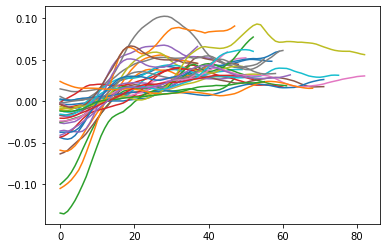

In [133]:
fig = plt.figure
for i in data_oppgang.trix:
    plt.plot(i)
#plt.savefig('images/trixplot')

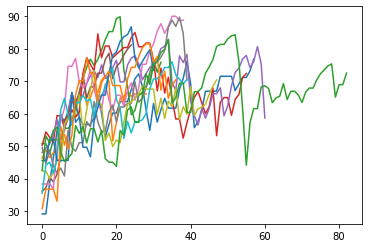

In [117]:
fig = plt.figure
for i in data.rsi:
    plt.plot(i)
#plt.savefig('images/rsiplot')

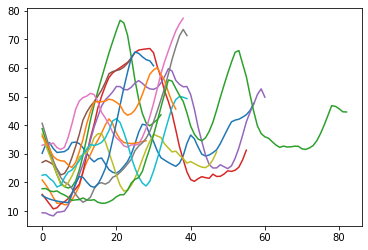

In [118]:
fig = plt.figure
for i in data.adxr:
    plt.plot(i)
#plt.savefig('images/adxrplot')

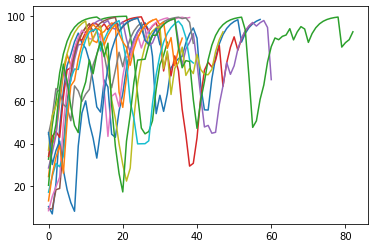

In [119]:
fig = plt.figure
for i in data.kdjk:
    plt.plot(i)
#plt.savefig('images/kdjkplot')